# P🅰️RTs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import Imputer

## Analysis II

In [2]:
data = pd.read_csv('part_count.csv', index_col=0)

In [3]:
data

,mon,thur,fri
1,18.0,23.0,23.0
2,5.0,13.0,38.0
3,16.0,18.0,19.0
4,17.0,13.0,40.0
5,26.0,29.0,NaN
6,NaN,8.0,47.0
7,14.0,27.0,51.0
8,32.0,NaN,49.0
9,NaN,NaN,NaN
10,10.0,17.0,NaN


First things first... almost 1100 P🅰️RTs!

In [4]:
data.sum().sum()

1083.0

Let's get a quick visualization of the P🅰️RTs over time...

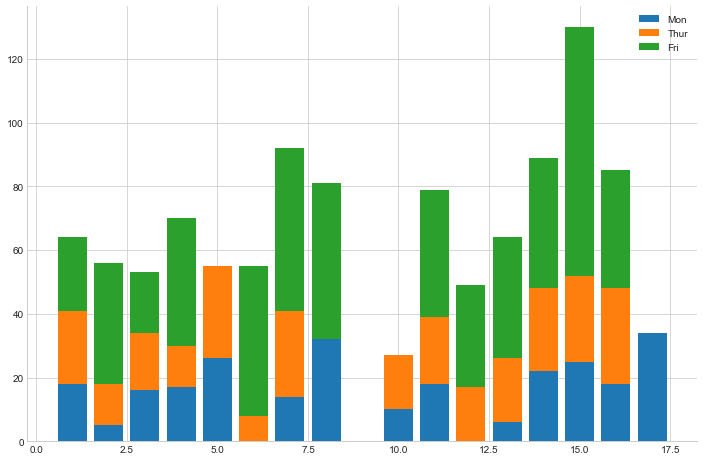

In [5]:
data_ = data.fillna(0)

fig, ax = plt.subplots(figsize=[12, 8])
mon  = plt.bar(data_.index, data_['mon'],
               label='Mon')
thur = plt.bar(data_.index, data_['thur'],
               bottom=data_['mon'], label='Thur')
fri  = plt.bar(data_.index, data_['fri'],
               bottom=data_['mon'] + data_['thur'], label='Fri')
plt.legend()
sns.despine()
plt.show()

And now let's see how the number of P🅰️RTs changes depending on the day...

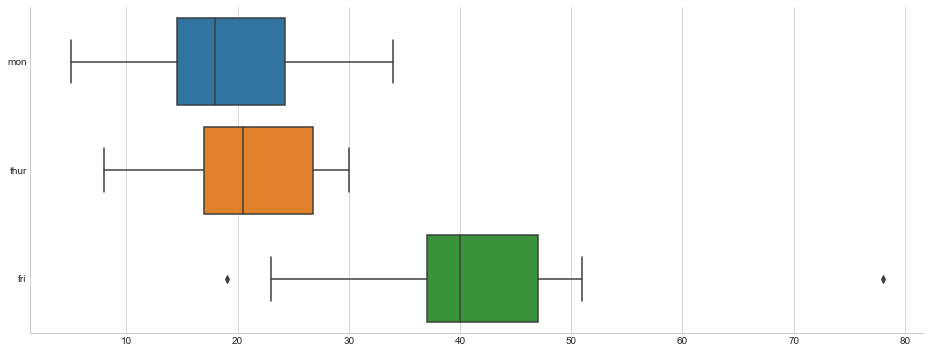

In [6]:
fig, ax = plt.subplots(figsize=[16, 6])
sns.boxplot(data=data, orient='h');
sns.despine()

## Algebra

In [10]:
data = pd.read_csv('part_count_algebra.csv', index_col=0)

In [11]:
data

,tue,fri
1,4.0,24.0
2,13.0,32.0
3,16.0,21.0
4,NaN,12.0
5,17.0,NaN
6,33.0,18.0
7,35.0,21.0
8,13.0,29.0
9,21.0,29.0
10,0.0,37.0


First things first... almost 1100 P🅰️RTs!

In [12]:
data.sum().sum()

551.0

Let's get a quick visualization of the P🅰️RTs over time...

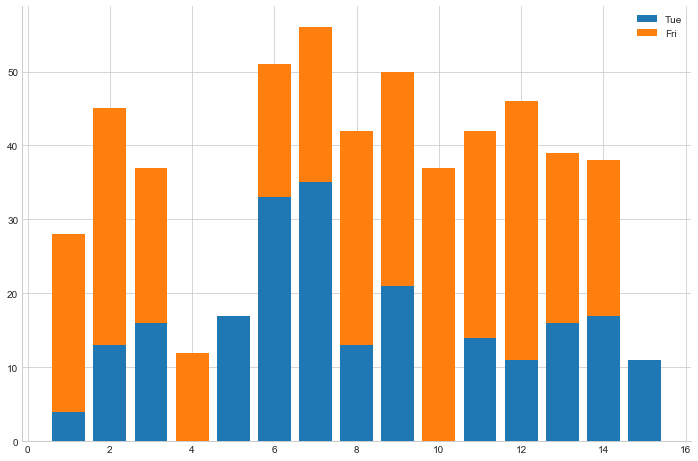

In [14]:
data_ = data.fillna(0)

fig, ax = plt.subplots(figsize=[12, 8])
thur = plt.bar(data_.index, data_['tue'],
               bottom=0, label='Tue')
fri  = plt.bar(data_.index, data_['fri'],
               bottom=data_['tue'], label='Fri')
plt.legend()
sns.despine()
plt.show()

And now let's see how the number of P🅰️RTs changes depending on the day...

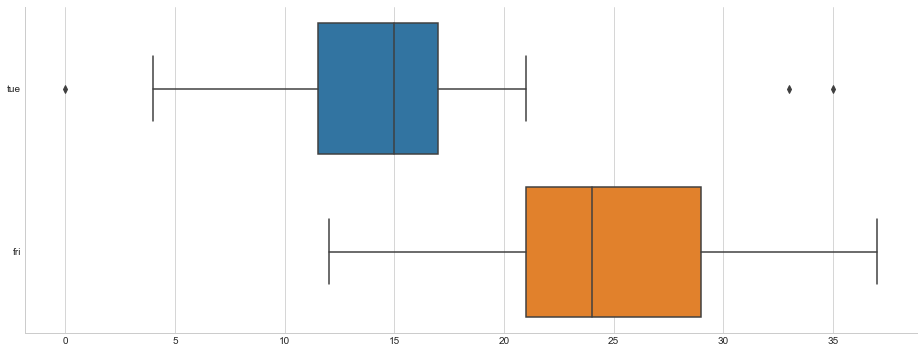

In [15]:
fig, ax = plt.subplots(figsize=[16, 6])
sns.boxplot(data=data, orient='h');
sns.despine()